In [1]:
from pyke import KeplerTargetPixelFile
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from oktopus import UniformPrior, JointPrior

In [5]:
from pyke import PRFPhotometry, SceneModel
from pyke.utils import KeplerQualityFlags

In [6]:
tpf = KeplerTargetPixelFile('https://archive.stsci.edu/missions/k2/target_pixel_files/c12/246100000/99000/ktwo246199087-c12_lpd-targ.fits.gz',
                            quality_mask=KeplerQualityFlags.HARDEST_BITMASK)

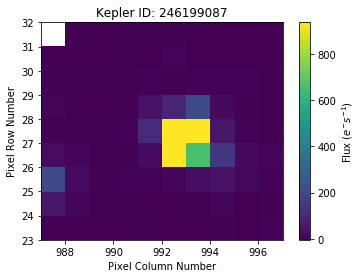

In [7]:
tpf.plot()

In [8]:
prf = tpf.get_prf_model()

In [9]:
prior_column = UniformPrior(lb=990, ub=996, name='column')
prior_row = UniformPrior(lb=25, ub=30, name='row')
prior_flux = UniformPrior(lb=4e3, ub=2e4, name='flux')
prior_bkg = UniformPrior(lb=1, ub=2e3, name='bkg')

In [10]:
prior = JointPrior(prior_flux, prior_column, prior_row, prior_bkg)

In [11]:
scene = SceneModel(prfs=[prf])

In [12]:
phot = PRFPhotometry(scene_model=scene, prior=prior)

In [13]:
results = phot.fit(tpf.flux + tpf.flux_bkg)

  0%|          | 0/3379 [00:00<?, ?it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
 35%|███▍      | 1176/3379 [00:56<01:45, 20.83it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1852: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
100%|██████████| 3379/3379 [02:35<00:00, 21.75it/s]


In [14]:
flux = results[:, 0]
col = results[:, 1]
row = results[:, 2]
bkg = results[:, 3]

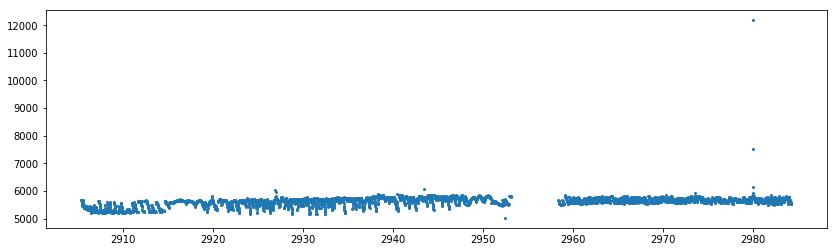

In [15]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time, flux, 'o', markersize=2)

In [16]:
q = tpf.time < 2956

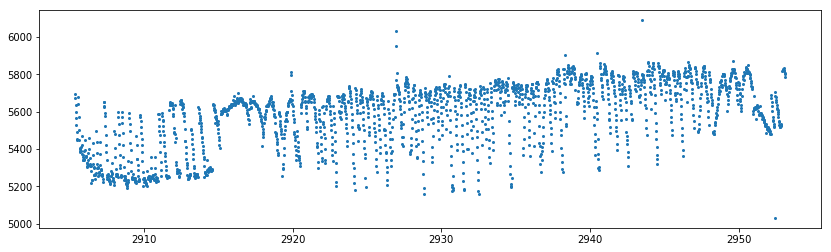

In [17]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[q], flux[q], 'o', markersize=2)

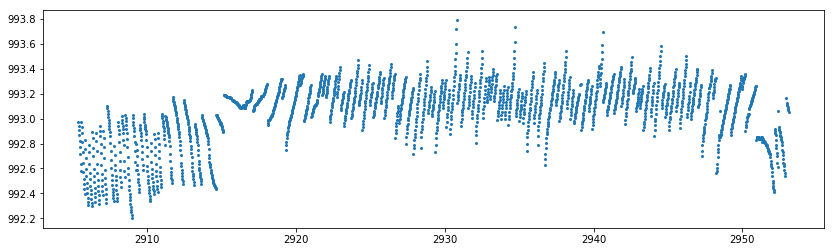

In [18]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[q], col[q], 'o', markersize=2)

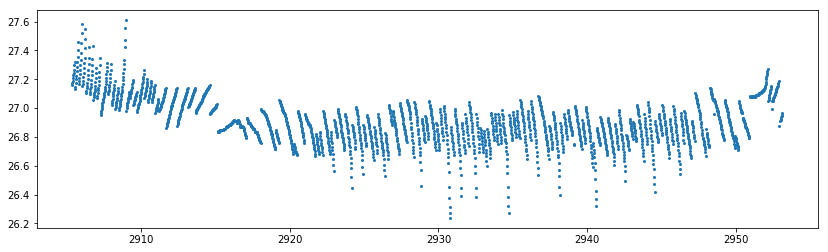

In [19]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[q], row[q], 'o', markersize=2)

In [20]:
np.warnings.filterwarnings('ignore')

In [21]:
from pyke.lightcurve import SFFCorrector

(0.975, 1.025)

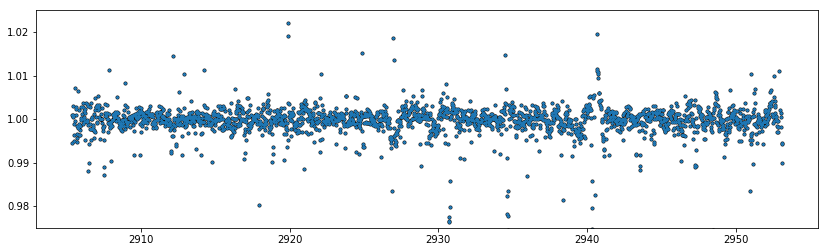

In [59]:
sff = SFFCorrector()
lc1 = sff.correct(tpf.time[q], flux[q], col[q], row[q], niters=10, windows=20, sigma=3)
plt.figure(figsize=[14, 4])
plt.plot(lc1.time, lc1.flux, 'ko', markersize=3)
plt.plot(lc1.time, lc1.flux, 'o', markersize=2)
plt.ylim(.975, 1.025)

(0.975, 1.025)

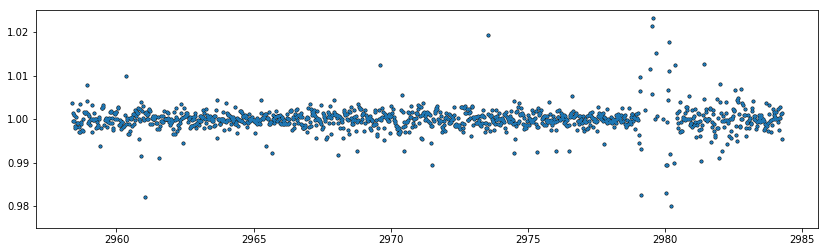

In [60]:
lc2 = sff.correct(tpf.time[~q], flux[~q], col[~q], row[~q], niters=10, windows=20, sigma=3)
plt.figure(figsize=[14, 4])
plt.plot(lc2.time, lc2.flux, 'ko', markersize=3)
plt.plot(lc2.time, lc2.flux, 'o', markersize=2)
plt.ylim(.975, 1.025)

In [61]:
lc = lc1.stitch(lc2)

(0.975, 1.025)

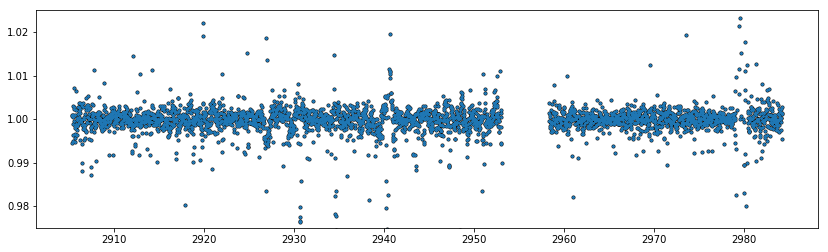

In [62]:
plt.figure(figsize=[14, 4])
plt.plot(lc.time, lc.flux, 'ko', markersize=3)
plt.plot(lc.time, lc.flux, 'o', markersize=2)
plt.ylim(.975, 1.025)

(-0.05, 0.05)

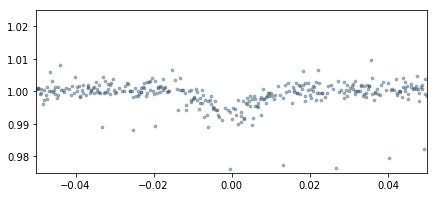

In [63]:
fold_p1 = lc.fold(1.5108739, phase=2457322.51736 - 2454833.0)
plt.figure(figsize=[7, 3])
plt.plot(fold_p1.time, fold_p1.flux, 'ko', markersize=3, alpha=.2)
plt.plot(fold_p1.time, fold_p1.flux, 'o', markersize=2, alpha=.2)
plt.ylim(.975, 1.025)
plt.xlim(-.05, .05)

(-0.05, 0.05)

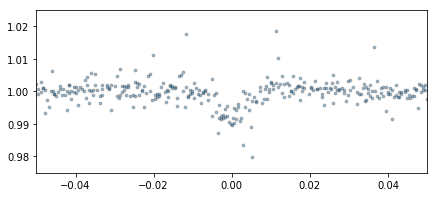

In [64]:
fold_p2 = lc.fold(2.421818, phase=2457282.80728 - 2454833.0)
plt.figure(figsize=[7, 3])
plt.plot(fold_p2.time, fold_p2.flux, 'ko', markersize=3, alpha=.2)
plt.plot(fold_p2.time, fold_p2.flux, 'o', markersize=2, alpha=.2)
plt.ylim(.975, 1.025)
plt.xlim(-.05, .05)

(-0.05, 0.05)

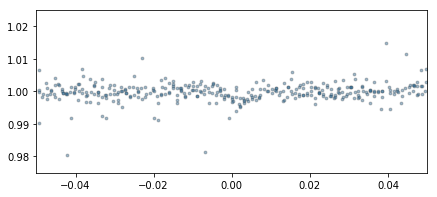

In [65]:
fold_p3 = lc.fold(4.049610, phase=2457670.14165 - 2454833.0)
plt.figure(figsize=[7, 3])
plt.plot(fold_p3.time, fold_p3.flux, 'ko', markersize=3, alpha=.2)
plt.plot(fold_p3.time, fold_p3.flux, 'o', markersize=2, alpha=.2)
plt.ylim(.975, 1.025)
plt.xlim(-.05, .05)

(-0.05, 0.05)

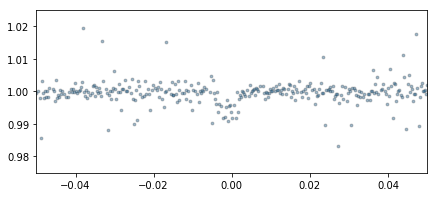

In [66]:
fold_p4 = lc.fold(6.099615, phase=2457660.37859 - 2454833.0)
plt.figure(figsize=[7, 3])
plt.plot(fold_p4.time, fold_p4.flux, 'ko', markersize=3, alpha=.2)
plt.plot(fold_p4.time, fold_p4.flux, 'o', markersize=2, alpha=.2)
plt.ylim(.975, 1.025)
plt.xlim(-.05, .05)

(-0.05, 0.05)

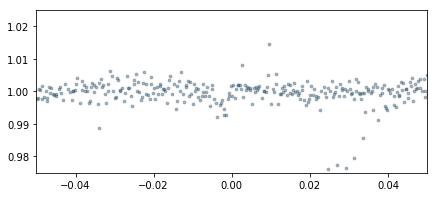

In [67]:
fold_p5 = lc.fold(9.206690, phase=2457671.39767 - 2454833.0)
plt.figure(figsize=[7, 3])
plt.plot(fold_p5.time, fold_p5.flux, 'ko', markersize=3, alpha=.2)
plt.plot(fold_p5.time, fold_p5.flux, 'o', markersize=2, alpha=.2)
plt.ylim(.975, 1.025)
plt.xlim(-.05, .05)

(-0.05, 0.05)

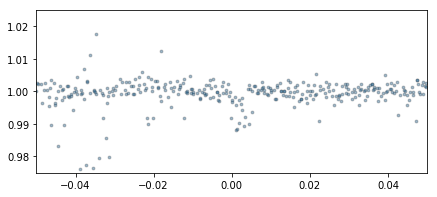

In [68]:
fold_p6 = lc.fold(12.35294, phase=2457665.34937 - 2454833.0)
plt.figure(figsize=[7, 3])
plt.plot(fold_p6.time, fold_p6.flux, 'ko', markersize=3, alpha=.2)
plt.plot(fold_p6.time, fold_p6.flux, 'o', markersize=2, alpha=.2)
plt.ylim(.975, 1.025)
plt.xlim(-.05, .05)

(-0.05, 0.05)

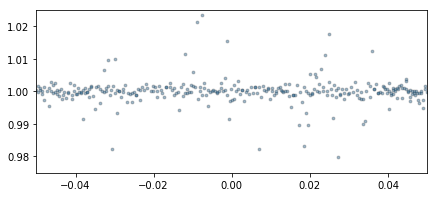

In [69]:
fold_p7 = lc.fold(18.767, phase=2457662.55284 - 2454833.0)
plt.figure(figsize=[7, 3])
plt.plot(fold_p7.time, fold_p7.flux, 'ko', markersize=3, alpha=.2)
plt.plot(fold_p7.time, fold_p7.flux, 'o', markersize=2, alpha=.2)
plt.ylim(.975, 1.025)
plt.xlim(-.05, .05)

## Short-cadence

In [ ]:
tpf_sc = KeplerTargetPixelFile("https://archive.stsci.edu/missions/k2/target_pixel_files/"
                               "c12/246100000/99000/ktwo246199087-c12_spd-targ.fits.gz")